In [1]:
import preprocessing as p
from keras.models import load_model
from keras.preprocessing import image
from matplotlib import patches
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import cv2
from PIL import Image

Using TensorFlow backend.


In [2]:
file = open('dependencies/key_dicts', 'rb')
key_dicts = pickle.load(file)
file.close()

In [3]:
final_model = load_model('models/model.h5')









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
pred_dir = 'data/img/train/Tee/1981_Graphic_Ringer_Tee/img_00000003.jpg'
img = image.load_img(pred_dir, target_size=(200, 200))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

predictions = final_model.predict(img_tensor)

In [5]:
predictions = [i.flatten().tolist() for i in predictions]

In [6]:
bbox = [i*256 for i in predictions[1]]

In [7]:
cats = predictions[0]
labels = dict((v,k) for v,k in zip(key_dicts,cats))
labels_x = sorted(labels.items(), key = lambda x : x[1])

In [8]:
for i in range(5):
    for j in labels_x:
        if (j[1] == max(cats)):
            print(j)
            cats.remove(j[1])
            labels_x.remove(j)

('Dress', 0.25930359959602356)
('Tee', 0.0665053054690361)
('Skirt', 0.06496221572160721)
('Blouse', 0.036825019866228104)
('Top', 0.03313080221414566)


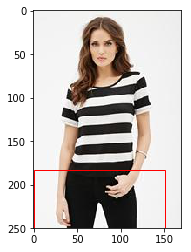

In [9]:
im = np.array(Image.open(pred_dir), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((bbox[0],bbox[3]),bbox[2]-bbox[0],bbox[3]-bbox[0],linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()